In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Code

In [ ]:
# Time Taken: 101 mins
clf_knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski']
}

# Create KNN classifiers for each attack type
clf_knn_DoS = KNeighborsClassifier()
clf_knn_DoS_features = KNeighborsClassifier()
clf_knn_Probe = KNeighborsClassifier()
clf_knn_Probe_features = KNeighborsClassifier()
clf_knn_R2L = KNeighborsClassifier()
clf_knn_R2L_features = KNeighborsClassifier()
clf_knn_U2R = KNeighborsClassifier()
clf_knn_U2R_features = KNeighborsClassifier()

# Fit the classifiers on the training data
clf_knn_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_knn_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_knn_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_knn_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_knn_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_knn_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_knn_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_knn_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Create StratifiedKFold instance for cross-validation
stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best value of K for each classifier
grid_search_DoS = GridSearchCV(clf_knn_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_knn_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_knn_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_knn_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_knn_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_knn_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_knn_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_knn_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the grid search on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Get the best value of K for each classifier
best_K_DoS = grid_search_DoS.best_params_['n_neighbors']
best_K_DoS_features = grid_search_DoS_features.best_params_['n_neighbors']
best_K_Probe = grid_search_Probe.best_params_['n_neighbors']
best_K_Probe_features = grid_search_Probe_features.best_params_['n_neighbors']
best_K_R2L = grid_search_R2L.best_params_['n_neighbors']
best_K_R2L_features = grid_search_R2L_features.best_params_['n_neighbors']
best_K_U2R = grid_search_U2R.best_params_['n_neighbors']
best_K_U2R_features = grid_search_U2R_features.best_params_['n_neighbors']

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Create new KNN classifiers with the best value of K
clf_knn_DoS = KNeighborsClassifier(n_neighbors=best_K_DoS)
clf_knn_DoS_features = KNeighborsClassifier(n_neighbors=best_K_DoS_features)
clf_knn_Probe = KNeighborsClassifier(n_neighbors=best_K_Probe)
clf_knn_Probe_features = KNeighborsClassifier(n_neighbors=best_K_Probe_features)
clf_knn_R2L = KNeighborsClassifier(n_neighbors=best_K_R2L)
clf_knn_R2L_features = KNeighborsClassifier(n_neighbors=best_K_R2L_features)
clf_knn_U2R = KNeighborsClassifier(n_neighbors=best_K_U2R)
clf_knn_U2R_features = KNeighborsClassifier(n_neighbors=best_K_U2R_features)

# Fit the new classifiers on the training data
clf_knn_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_knn_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_knn_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_knn_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_knn_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_knn_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_knn_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_knn_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

Best parameters for DoS classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for DoS classifier with features: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Best parameters for Probe classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Probe classifier with features: {'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for R2L classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for R2L classifier with features: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Best parameters for U2R classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7, 'wei

KNeighborsClassifier()

### DoS Evaluation

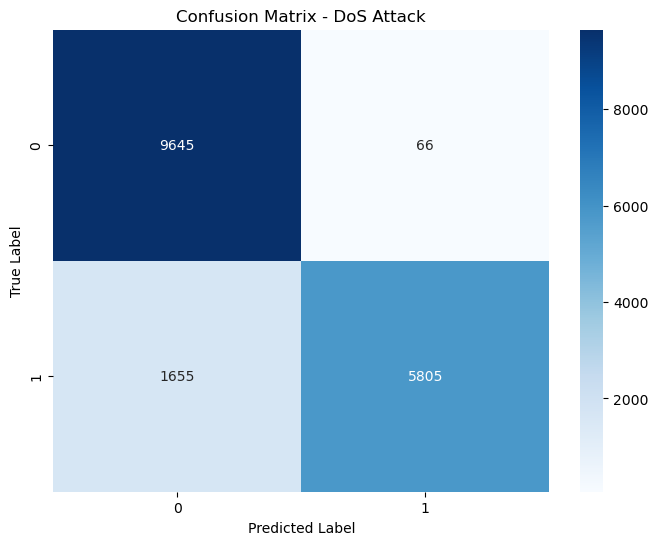

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      9711
           1       0.99      0.78      0.87      7460

    accuracy                           0.90     17171
   macro avg       0.92      0.89      0.89     17171
weighted avg       0.91      0.90      0.90     17171



In [ ]:
Y_DoS_pred = clf_knn_DoS.predict(X_DoS_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report for Probe:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
Predicted attacks     0     1
Actual attacks               
0                  9249   462
1                  2231  5229
Accuracy: 0.8431658028070584


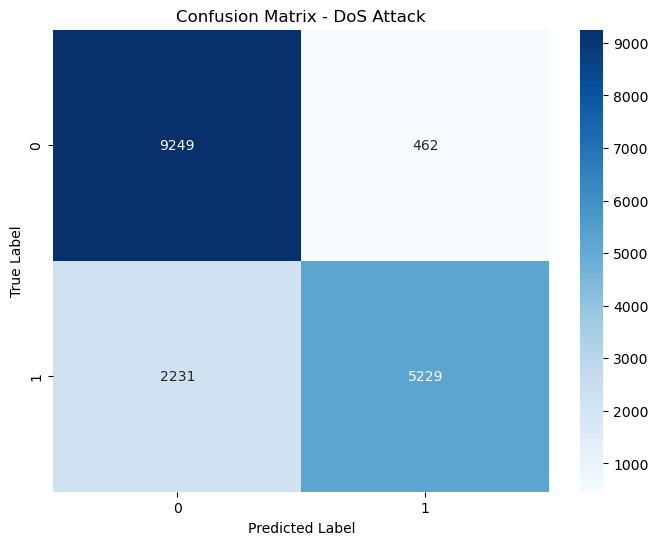

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9711
           1       0.92      0.70      0.80      7460

    accuracy                           0.84     17171
   macro avg       0.86      0.83      0.83     17171
weighted avg       0.85      0.84      0.84     17171

AUC-ROC Score for DoS Prediction: 0.8637912135239245


In [ ]:
# Make predictions on the test set
Y_DoS_pred_feature = clf_knn_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred_feature)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred_feature))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_DoS_pred_proba = clf_knn_DoS_features.predict_proba(X_newDoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### Probe prediction

In [ ]:
Y_Probe_pred = clf_knn_Probe.predict(X_Probe_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_Probe_test, Y_Probe_pred)


# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for Probe:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for Probe:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

Evaluation Metrics for Probe:
Accuracy: 0.8589680184635674

Confusion Matrix for Probe:
Predicted attacks     0     2
Actual attacks               
0                  9030   681
2                  1030  1391

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9711
           2       0.67      0.57      0.62      2421

    accuracy                           0.86     12132
   macro avg       0.78      0.75      0.77     12132
weighted avg       0.85      0.86      0.85     12132



### Probe prediction with feature selection

Confusion Matrix for Probe with feature selection:
Predicted attacks     0     2
Actual attacks               
0                  9073   638
2                  1131  1290
Accuracy: 0.8541872733267392


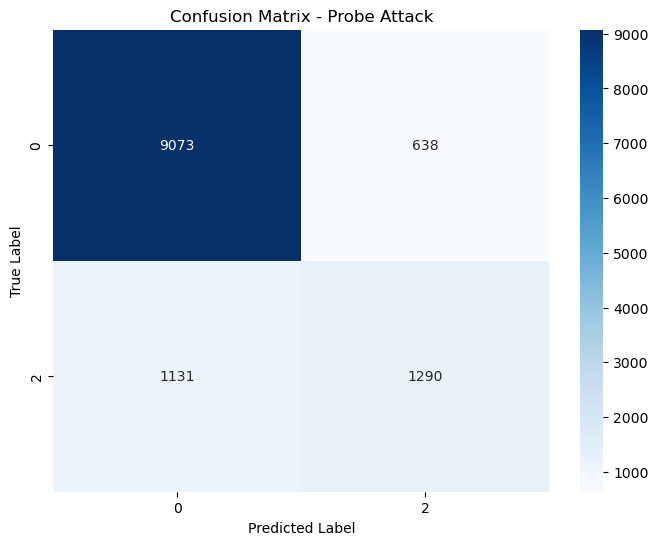

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9711
           2       0.67      0.53      0.59      2421

    accuracy                           0.85     12132
   macro avg       0.78      0.73      0.75     12132
weighted avg       0.85      0.85      0.85     12132

AUC-ROC Score for Probe Prediction: 0.7450688380355002


In [ ]:
# Make predictions on the test set
Y_Probe_pred = clf_knn_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe= pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for Probe with feature selection:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_Probe_pred_proba = clf_knn_Probe_features.predict_proba(X_newProbe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe Prediction:", auc_roc_score)

### R2L prediction

In [ ]:
Y_R2L_pred=clf_knn_R2L.predict(X_R2L_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_R2L_test, Y_R2L_pred)


# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for R2L:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for R2L:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

Evaluation Metrics for R2L:
Accuracy: 0.7870752619879327

Confusion Matrix for R2L:
Predicted attacks     0    3
Actual attacks              
0                  9703    8
3                  2674  211

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      9711
           3       0.96      0.07      0.14      2885

    accuracy                           0.79     12596
   macro avg       0.87      0.54      0.51     12596
weighted avg       0.83      0.79      0.71     12596



### R2L prediction with feature selection

Confusion Matrix for R2L with feature selection:
Predicted attacks     0    3
Actual attacks              
0                  9705    6
3                  2602  283
Accuracy: 0.7929501429025088


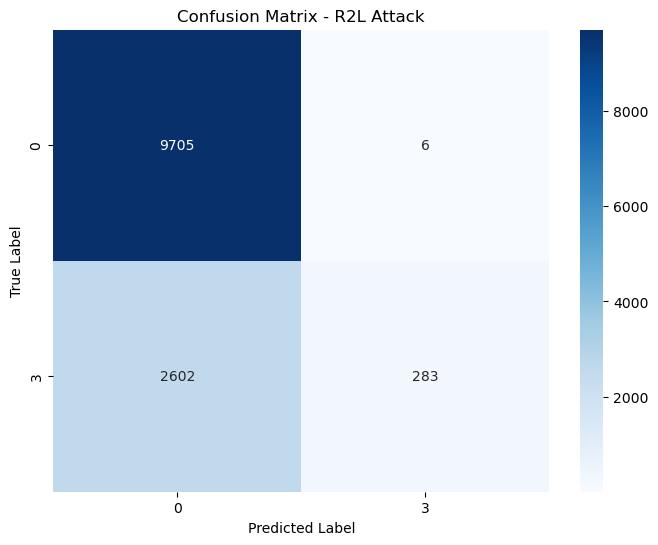

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.98      0.10      0.18      2885

    accuracy                           0.79     12596
   macro avg       0.88      0.55      0.53     12596
weighted avg       0.83      0.79      0.72     12596

AUC-ROC Score for R2L Prediction: 0.5812365937107538


In [ ]:
# Make predictions on the test set
Y_R2L_pred = clf_knn_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for R2L with feature selection:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_R2L_pred_proba = clf_knn_R2L_features.predict_proba(X_newR2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for R2L Prediction:", auc_roc_score)

### U2R prediction

In [ ]:
Y_U2R_pred=clf_knn_U2R.predict(X_U2R_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_U2R_test, Y_U2R_pred)

# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for U2R:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for U2R:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

Evaluation Metrics for U2R:
Accuracy: 0.9947842094497852

Confusion Matrix for U2R:
Predicted attacks     0   4
Actual attacks             
0                  9706   5
4                    46  21

Classification Report for Probe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.81      0.31      0.45        67

    accuracy                           0.99      9778
   macro avg       0.90      0.66      0.72      9778
weighted avg       0.99      0.99      0.99      9778



### U2R prediction with feature selection

Confusion Matrix for U2R with feature selection:
Predicted attacks     0   4
Actual attacks             
0                  9707   4
4                    49  18
Accuracy: 0.9945796686438945


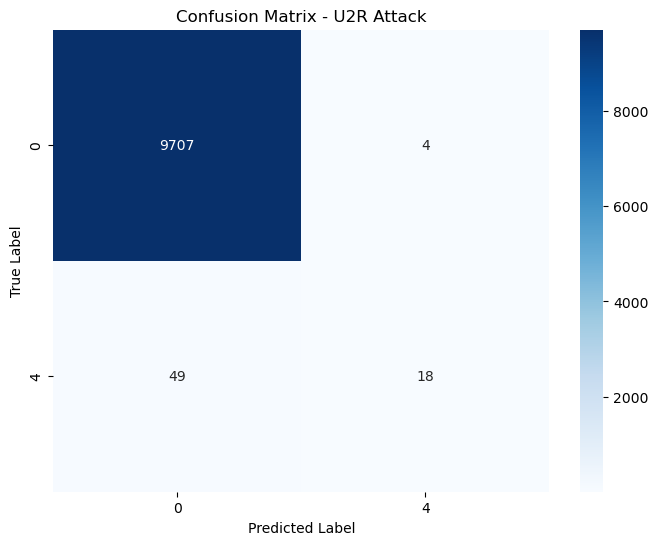

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.82      0.27      0.40        67

    accuracy                           0.99      9778
   macro avg       0.91      0.63      0.70      9778
weighted avg       0.99      0.99      0.99      9778

AUC-ROC Score for U2R Prediction: 0.7459120830816568


In [ ]:
# Make predictions on the test set
Y_U2R_pred = clf_knn_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for U2R with feature selection:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
# Ensure to use the transformed test set
Y_U2R_pred_proba = clf_knn_U2R_features.predict_proba(X_newU2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)